## Lab 2 31.01.2017

Deadline 07.02 (send via e-mail)
-1 point per each day of delay
0 since 13.02

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
import numpy.random as rnd
%matplotlib inline

### Clustering coefficient

During the lecture we have understood, that the clustering coefficient of a random graph is equal to the probability $p$: $$\text{Clustering coefficient} = \frac{\langle k \rangle}{n} = p $$

In this task you have to check it on generated data.
Please, generate $100$ Random Graphs with $n = 1000$ and $p = 0.002$ (for saving computational time) and plot the box-plot of your computations.

In [4]:
def randgp(n, p):
    G = nx.Graph()
    G.add_nodes_from(range(0, n))
    
    for i in range(0, n - 1):
        for j in range(i + 1, n):
            if rnd.random() <= p:
                G.add_edge(i,j)
        
    return G

In [5]:
def degree_avg(G):
    return np.mean([G.degree(v) for v in G.nodes()])

{'boxes': [<matplotlib.lines.Line2D at 0xa1fa278>],
 'caps': [<matplotlib.lines.Line2D at 0xa1fdb38>,
 'fliers': [<matplotlib.lines.Line2D at 0x93c2cf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x93c2550>],
 'whiskers': [<matplotlib.lines.Line2D at 0xa1faba8>,
  <matplotlib.lines.Line2D at 0xa1fadd8>]}

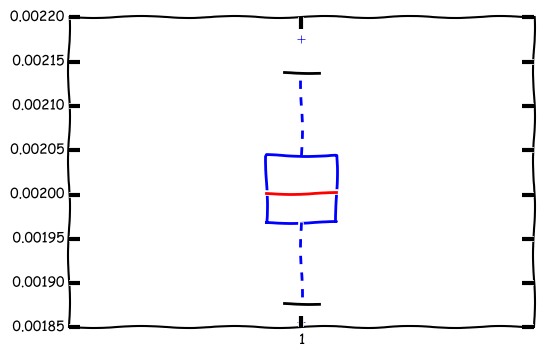

In [29]:
n = 1000
p = 0.002
sample_size = 100

data = [degree_avg(randgp(n, p)) / n for _ in range(sample_size)]
plt.boxplot(data)

### Size of small components

In this task you are asked to calculate the average size of small components (small component = not a giant one) with regard to average degree of the network. To see the effect clearly, plot average size around $\langle k \rangle = 1$.

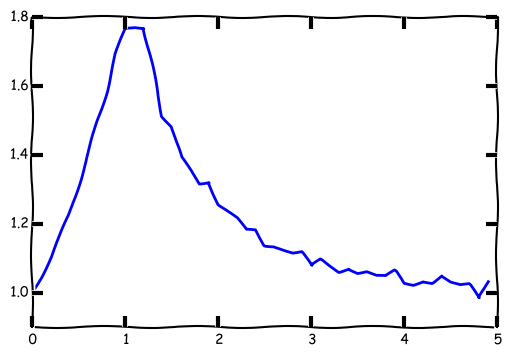

In [6]:
def small_components_size_avg(avg_k, n=500, iterations=50):
    p = avg_k / n
    results = []
    
    for _ in range(iterations):
        G = randgp(n, p)
        components = sorted(nx.connected_components(G), key=len)
        avg_size = np.mean([len(component) for component in components[:-1]]) if len(components) != 1 else 0
        results.append(avg_size)

    return np.mean(results)

#small_components_size_avg(1.2)
sample = np.arange(0.0, 5.0, 0.1)
results = [small_components_size_avg(avg_k) for avg_k in sample]
plt.plot(sample, results)

### Average path length and transitivity

Plot the average path length and transitivity coefficents with $n=1000$ and p=0.001 while increasing by 0.003 

In [7]:
# Put your code here